In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('RickAndMortyScripts.csv')

In [3]:
df

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."
...,...,...,...,...,...,...
1900,2483,3,7,Tales From the Citadel,Morty,That was amazing!
1901,2484,3,7,Tales From the Citadel,Rick,Got some of that mermaid puss!
1902,2485,3,7,Tales From the Citadel,Morty,I'm really hoping it wasn't a one-off thing an...
1903,2486,3,7,Tales From the Citadel,Rick,"Pssh! Not at all, Morty. That place will never..."


In [4]:
df = df.drop(['index', 'season no.', 'episode no.', 'episode name'], axis=1)

In [5]:
df.dropna(axis =0, inplace=True)

In [6]:
indi = []
for i in df["line"].values:
        if len(i) < 25:
            x = df[df['line']==i].index.values
            indi.append(x)
            
indis = []
for i in indi:
    indis.append(i[0])                   

In [7]:
stopwords=nltk.corpus.stopwords.words("english")

In [8]:
line2 = []
line1 = []
for i in df["line"]:
    caps = []
    x = nltk.word_tokenize(i, 'english')
    for j in x:
        if j.lower() not in stopwords and len(j) > 2:
            
            caps.append(j)
    line2.append(nltk.Text(caps))
    line1.append(caps)

In [9]:
df["Stopwords"] = line2 

In [10]:
df["Stopwords"] = df["Stopwords"].map(lambda x : ' '.join(x))

In [11]:
df

,name,line,Stopwords
0,Rick,Morty! You gotta come on. Jus'... you gotta co...,Morty got come Jus ... got come
1,Morty,"What, Rick? What’s going on?",Rick going
2,Rick,"I got a surprise for you, Morty.",got surprise Morty
3,Morty,It's the middle of the night. What are you tal...,middle night talking
4,Rick,"Come on, I got a surprise for you. Come on, h...",Come got surprise Come hurry
...,...,...,...
1900,Morty,That was amazing!,amazing
1901,Rick,Got some of that mermaid puss!,Got mermaid puss
1902,Morty,I'm really hoping it wasn't a one-off thing an...,really hoping n't one-off thing see way hey .....
1903,Rick,"Pssh! Not at all, Morty. That place will never...",Pssh Morty place never bearing lives ever Unli...


In [12]:
tokens=nltk.word_tokenize(df["Stopwords"].sum(),"english")

In [13]:
palabras_total=len(tokens) 
print(palabras_total)

11055


In [14]:
tokens_conjunto=set(tokens) #número de palabras únicas
palabras_diferentes=len(tokens_conjunto)
print(palabras_diferentes)

4505


In [15]:
def riqueza_lexica(tokens): 
    tokens_conjunto=set(tokens)
    palabras_totales=len(tokens) 
    palabras_diferentes=len(tokens_conjunto)
    riqueza_lexica=palabras_diferentes/palabras_totales
    return riqueza_lexica

In [16]:
riqueza_lexica(tokens)

0.4075079149706015

In [17]:
texto_nltk=nltk.Text(tokens) 
distribucion=nltk.FreqDist(texto_nltk) 
lista_frecuencias=distribucion.most_common() #Para ordenar la distribución de la frecuencia de palabras
print(lista_frecuencias[:10])

[("n't", 253), ('Morty', 235), ("'re", 218), ('know', 138), ('...', 137), ('get', 106), ('Rick', 104), ('gon', 99), ('like', 85), ('got', 76)]


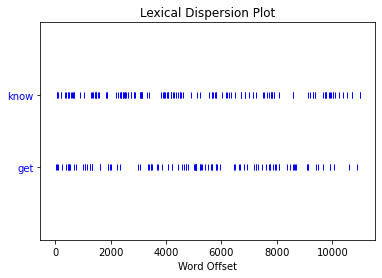

In [18]:
texto_nltk=nltk.Text(tokens) 

 
texto_nltk=nltk.Text(tokens) 
lista_palabras=["know",'get'] 
texto_nltk.dispersion_plot(lista_palabras)

In [19]:
hapaxes=distribucion.hapaxes()

In [20]:
palabras_total

11055

In [21]:
len(hapaxes)

3361

In [22]:
minus_hapaxes =[]
for i in hapaxes:
    minus_hapaxes.append(i.lower())

In [23]:
line2 = [] #documentos sin stopwords ni hapaxes

for i in df["Stopwords"]:
    caps = []
    x = nltk.word_tokenize(i, 'english')
    for j in x:
        if j.lower() not in stopwords and j.lower() not in minus_hapaxes and len(j) > 2:
            
            caps.append(j)
    line2.append(nltk.Text(caps))

In [24]:
df["Hapaxes"] = line2
df["Hapaxes"] = df["Hapaxes"].map(lambda x : ' '.join(x))

In [25]:
y = df["Hapaxes"].map(lambda x : nltk.word_tokenize(x, "english")).values

In [26]:
print(list(df["Hapaxes"].values)[:10])

['got come ... got come', 'going', 'got surprise', 'middle night talking', 'Come got surprise Come', "'re hard", 'got got get come Got surprise', 'think ... flying stuff found garage', 'Yeah ... surprise', '... make bomb bomb']


In [27]:
from nltk.stem import PorterStemmer #sacamos el stema de cada palabra
from nltk.tokenize import sent_tokenize

frases = list(df["Hapaxes"].values)
stemmer = PorterStemmer()
nueva_frase = []

for i in range(len(frases)):
    words = nltk.word_tokenize(frases[i])
    words=[stemmer.stem(word) for word in words]
    nueva_frase.append(' '.join(words))

In [28]:
import re

nueva_frase1 = [] #quitamos los números
pattern = r'\d+'
for i in nueva_frase:
    nueva_frase1.append(re.sub(pattern, ' ', i))

In [29]:
df["Stema"] = nueva_frase1

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer #obtenemos la matriz
from sklearn.feature_extraction.text import TfidfVectorizer

count = TfidfVectorizer()
count = count.fit(np.array(df["Stema"]))

tfidf = count.transform(np.array(df["Stema"])).toarray()

In [31]:
tfidf.flatten().mean()

0.0013218616026913204

In [32]:
columnas = count.get_feature_names() #columnas del nuevo dataframe

In [33]:
dfmatriz = pd.DataFrame(tfidf) #nuevo dataframe con tfidf

In [34]:
dfmatriz.index = df["line"]
dfmatriz.columns = columnas

## CLUSTERING 1 | KNN, K=8

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 500)
pca = pca.fit(dfmatriz)

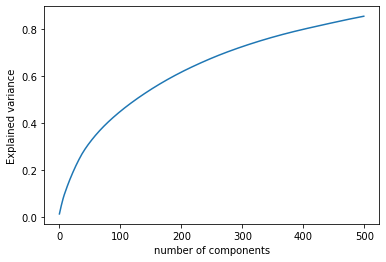

In [36]:
import matplotlib.pyplot as plt #comprobamos cuanta varianza recogemos con los primeros 500 componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()

In [37]:
model = PCA(n_components=500).fit(dfmatriz)
X_pc = model.transform(dfmatriz)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = dfmatriz.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
dfwordspca = pd.DataFrame(dic.items())

In [38]:
dfwordspca #dataframe con la palabra mas releventa en cada compnenete del pca

,0,1
0,PC0,know
1,PC1,get
2,PC2,re
3,PC3,yeah
4,PC4,okay
...,...,...
495,PC495,overreact
496,PC496,sixteen
497,PC497,took
498,PC498,overreact


In [39]:
dfpca = pd.DataFrame(pca.transform(dfmatriz))

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 

inercias = [] #sacamos las incercias de cada modelo desde 2 a 100 clusters
  
for k in range(2,50): 
    kmeans = KMeans(k)
    kmeans.fit(dfpca)     
    inercias.append(kmeans.inertia_) 

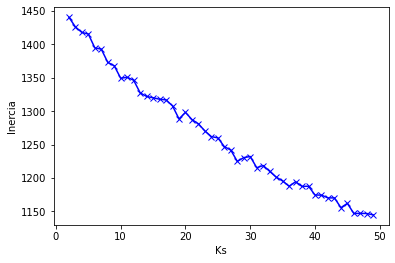

In [41]:
plt.plot(range(2,50), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [42]:
dfpca.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.042035,0.131862,-0.099218,-0.087820,-0.079181,0.165686,-0.029280,0.823312,0.054211,0.026525,...,0.001326,-0.010269,0.004317,-0.001171,0.009176,0.005687,0.004613,0.010510,-0.006856,-0.003031
1,-0.080616,-0.047528,0.004709,0.023054,-0.060013,-0.032967,0.027211,0.021236,-0.058216,0.082559,...,-0.002486,-0.005258,0.001648,0.003377,-0.004509,-0.001137,0.003597,-0.000392,0.003386,-0.000316
2,-0.052349,0.042632,-0.042705,-0.005603,-0.037952,0.046494,-0.017500,0.194111,0.026551,0.062658,...,-0.001642,0.000962,-0.000596,0.000060,-0.000699,0.000215,0.000021,-0.000027,-0.000385,0.000218
3,-0.052944,-0.031057,0.023115,-0.022249,-0.014639,-0.014243,-0.011840,-0.017754,-0.032231,-0.149278,...,0.009942,0.021248,-0.004699,-0.011907,0.001391,0.031199,-0.008222,0.025195,-0.004187,0.005966
4,-0.042200,0.096798,-0.086049,-0.071835,-0.061123,0.156547,-0.031053,0.773773,0.025936,-0.011896,...,0.001269,-0.005896,0.005294,-0.000995,0.002848,0.003194,0.000366,0.003682,-0.001601,-0.005001


In [43]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(dfpca)
kmeans.predict(dfpca)

array([3, 3, 3, ..., 3, 3, 4])

In [44]:
df["Clusters k-means"] = kmeans.labels_ #añadimos los labels al df original

In [45]:
df.head()

,name,line,Stopwords,Hapaxes,Stema,Clusters k-means
0,Rick,Morty! You gotta come on. Jus'... you gotta co...,Morty got come Jus ... got come,got come ... got come,got come ... got come,3
1,Morty,"What, Rick? What’s going on?",Rick going,going,go,3
2,Rick,"I got a surprise for you, Morty.",got surprise Morty,got surprise,got surpris,3
3,Morty,It's the middle of the night. What are you tal...,middle night talking,middle night talking,middl night talk,3
4,Rick,"Come on, I got a surprise for you. Come on, h...",Come got surprise Come hurry,Come got surprise Come,come got surpris come,3


In [46]:
df["Clusters k-means"].value_counts(normalize = True)

3    0.773228
2    0.064567
6    0.047769
1    0.031496
0    0.028871
4    0.025722
5    0.014698
7    0.013648
Name: Clusters k-means, dtype: float64

In [47]:
line2 = [] #eliminamos las stopwords de la columan title

for i in df["line"]:
    caps = []
    x = nltk.word_tokenize(i, 'english')
    for j in x:
        if j.lower() not in stopwords and len(j) > 2:
            
            caps.append(j)
    line2.append(nltk.Text(caps))

In [48]:
df.insert(1, 'line stopwords', line2) #creamos la columna de title sin stopwords

In [49]:
df["line stopwords"] = df["line stopwords"].map(lambda x : ' '.join(x)) 

In [50]:
df.columns = ['title','title stopwords', 'abstract', 'Stopwords', 'Hapaxes', 'Stema', 'Clusters kmenas']
#cambiamos el orden de las columnas

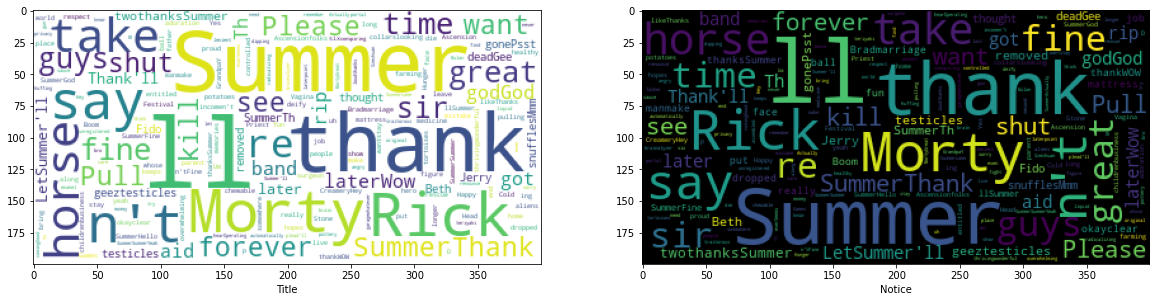

In [51]:

title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 0]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 0]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 0]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 0]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

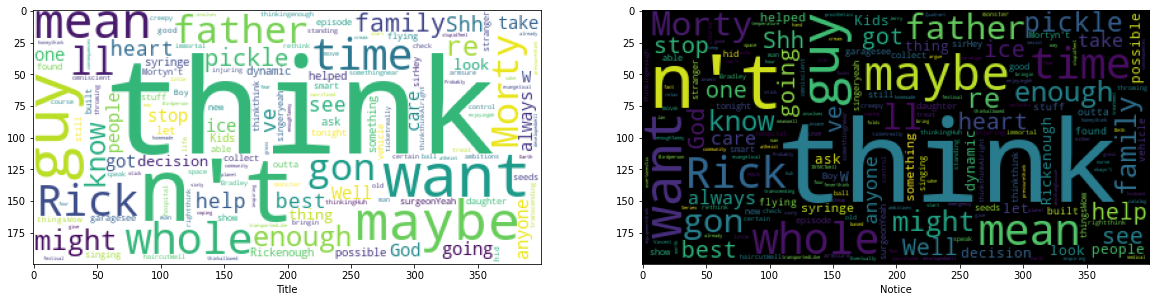

In [52]:
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 1]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 1]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 1]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 1]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

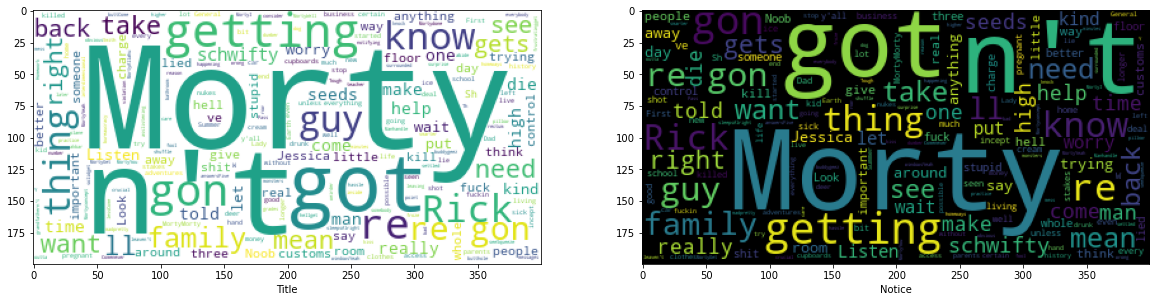

In [53]:
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 2]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 2]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 2]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 2]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

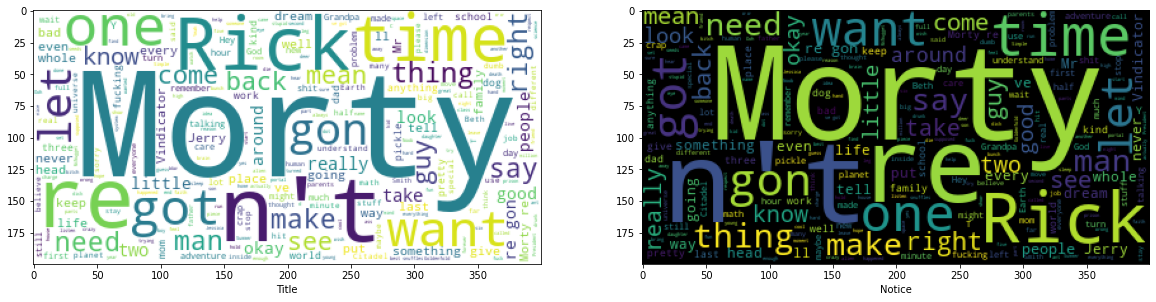

In [54]:
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 3]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 3]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 3]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 3]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

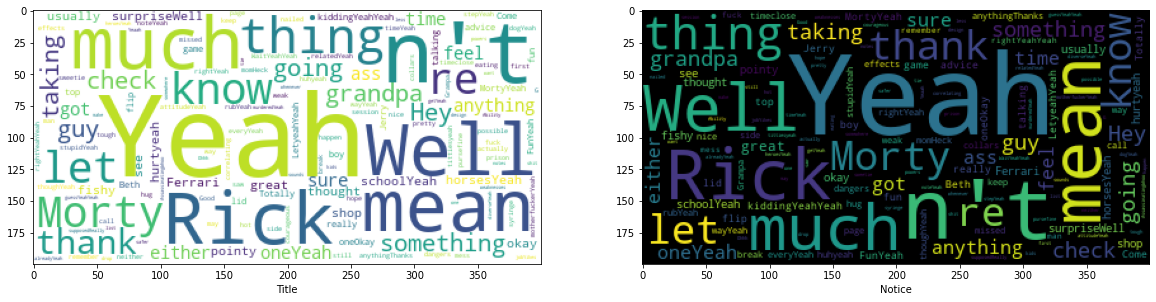

In [55]:
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 4]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 4]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 4]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 4]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

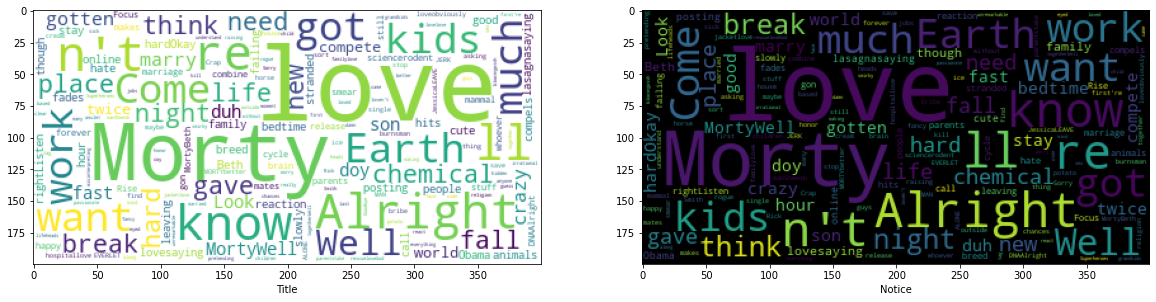

In [56]:
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 5]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 5]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 5]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 5]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

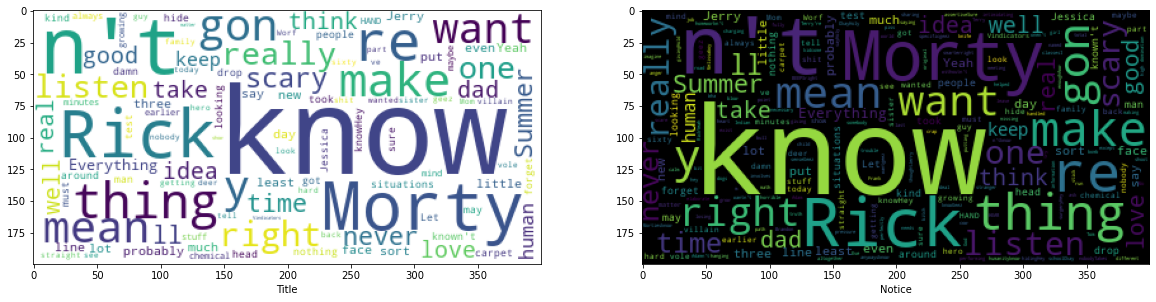

In [57]:
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 6]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 6]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 6]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 6]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

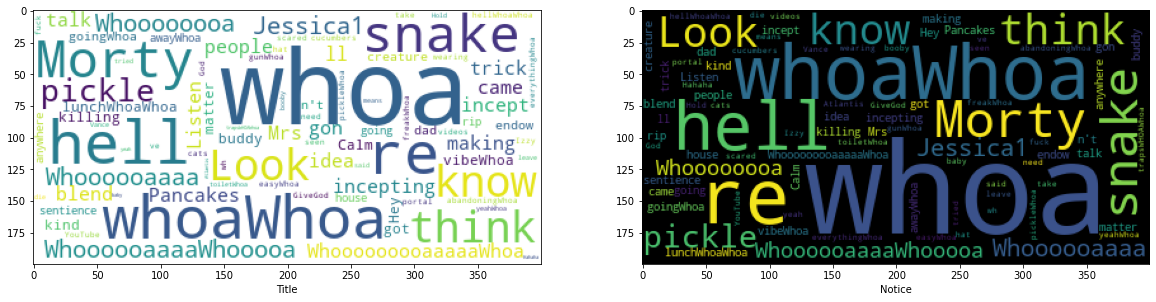

In [58]:
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 7]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 7]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 7]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 7]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()